# Описание

## Проверить выдвинутые гипотезы и Построить модель для описания признака `0.2% Proof Stress (MPa)`

Этот набор данных содержит состав сплава стали, а также температуры их обработки, и значения механических свойств, наблюдаемых во время испытаний.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('mech.csv')

data.head(10)

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,100,338,454,27,72
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,200,337,465,23,69
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,300,346,495,21,70
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,400,316,489,26,79
5,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,450,287,461,25,81
6,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,500,274,431,28,85
7,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,550,262,387,32,87
8,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,600,220,314,42,88
9,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,650,152,226,59,92


# Статистики
`Alloy code` - код сплава
### Состав сплава (в %)
`C` - углерод `Si` - кремний `Mn` - марганец

`P` - фосфор `S` - сера `Ni` - никель

`Cr` - хром `Mo` - молибден `Cu` - медь

`V` - ванадий `Al` - алюминий `N` - азот

`Ceq` - углеродный эквивалент `Nb+Ta` - ниобий и тантал
### Свойства сплава
`Temperature` - температура

`Proof Stress`- "доказательное напряжение"

`Tensile Strength` - прочность при растяжении

`Elongation` - удлинение

`Reduction in Area` - уменьшение площади площади

# Гипотезы

Датасет дает нам много информации о разных сплавах металлов и можно выдвинуть много различных гипотез, приведем несколько из них:
- Предположим, что связи между свойствами сплава `Proof Stress` и `Elongation` нет
- Предположим, что существует сильная связь между прочностью при натяжении и составом сплава.

В дальнейшем опровергнем или подтвердим эти гипотезы

In [3]:
data.columns

Index(['Alloy code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

Уберем пробелы в названиях столбцов и переименуем их для более удобного использования 

In [4]:
data.rename(columns={' C':'C', ' Si':'Si', ' Mn':'Mn', ' P':'P', ' S':'S', \
                    ' Ni':'Ni', ' Cr':'Cr', ' Mo':'Mo', ' Cu':'Cu', ' Al':'Al', \
                    ' N':'N', ' Temperature (°C)': 'Temperature', ' 0.2% Proof Stress (MPa)':'Proof_stress', \
                    ' Tensile Strength (MPa)':'Tensile_strength', ' Elongation (%)': 'Elongation', \
                    ' Reduction in Area (%)':'Reduction_in_area'}, inplace=True)

Проверим на наличие пропусков

In [5]:
data.isna().sum()

Alloy code           0
C                    0
Si                   0
Mn                   0
P                    0
S                    0
Ni                   0
Cr                   0
Mo                   0
Cu                   0
V                    0
Al                   0
N                    0
Ceq                  0
Nb + Ta              0
Temperature          0
Proof_stress         0
Tensile_strength     0
Elongation           0
Reduction_in_area    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alloy code         915 non-null    object 
 1   C                  915 non-null    float64
 2   Si                 915 non-null    float64
 3   Mn                 915 non-null    float64
 4   P                  915 non-null    float64
 5   S                  915 non-null    float64
 6   Ni                 915 non-null    float64
 7   Cr                 915 non-null    float64
 8   Mo                 915 non-null    float64
 9   Cu                 915 non-null    float64
 10  V                  915 non-null    float64
 11  Al                 915 non-null    float64
 12  N                  915 non-null    float64
 13  Ceq                915 non-null    float64
 14  Nb + Ta            915 non-null    float64
 15  Temperature        915 non-null    int64  
 16  Proof_stress       915 non

Посмотрим на статистики

In [7]:
data.describe()

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature,Proof_stress,Tensile_strength,Elongation,Reduction_in_area
count,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,0.174929,0.310918,0.812962,0.014543,0.010602,0.143016,0.427861,0.442870,0.079148,0.060190,0.012435,0.007652,0.093989,0.000041,351.601093,328.218579,496.248087,26.789071,70.206557
std,0.059674,0.086871,0.342775,0.005244,0.004024,0.172746,0.457568,0.394383,0.058481,0.096403,0.013067,0.002321,0.172533,0.000261,189.714773,131.653232,239.710650,8.806595,12.389289
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.000000,27.000000,162.000000,10.000000,18.000000
25%,0.130000,0.240000,0.500000,0.010000,0.008000,0.023000,0.040000,0.050000,0.040000,0.000000,0.004000,0.006200,0.000000,0.000000,200.000000,220.000000,413.000000,20.000000,62.000000
50%,0.160000,0.300000,0.680000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,400.000000,290.000000,479.000000,26.000000,71.000000
75%,0.200000,0.370000,1.210000,0.018000,0.012000,0.210000,1.000000,0.560000,0.110000,0.070000,0.016000,0.009000,0.000000,0.000000,500.000000,432.500000,575.000000,31.000000,80.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,650.000000,690.000000,6661.000000,78.000000,94.000000


### Построим графики

<AxesSubplot:>

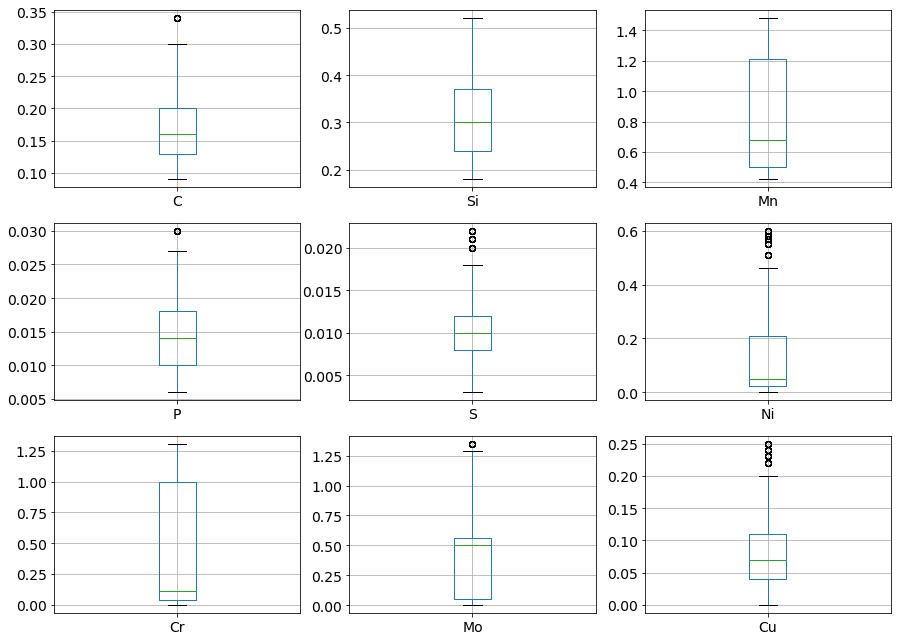

In [8]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = fig.add_subplot(431)
data.boxplot(column=["C"],fontsize='14')
ax1 = fig.add_subplot(432)
data.boxplot(column=["Si"],fontsize='14')
ax2 = fig.add_subplot(433)
data.boxplot(column=["Mn"],fontsize='14')
ax3 = fig.add_subplot(434)
data.boxplot(column=["P"],fontsize='14')
ax4 = fig.add_subplot(435)
data.boxplot(column=["S"],fontsize='14')
ax5 = fig.add_subplot(436)
data.boxplot(column=["Ni"],fontsize='14')
ax6 = fig.add_subplot(437)
data.boxplot(column=["Cr"],fontsize='14')
ax7 = fig.add_subplot(438)
data.boxplot(column=["Mo"],fontsize='14')
ax8 = fig.add_subplot(439)
data.boxplot(column=["Cu"],fontsize='14')

<AxesSubplot:>

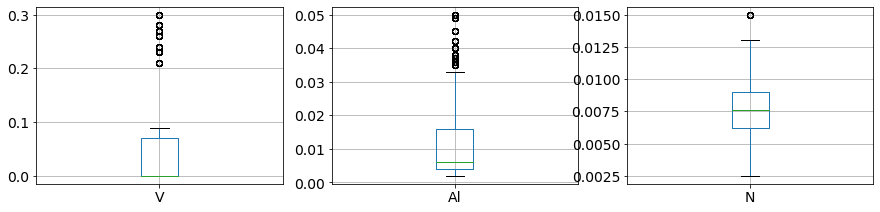

In [9]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax9 = fig.add_subplot(431)
data.boxplot(column=["V"],fontsize='14')
ax10 = fig.add_subplot(432)
data.boxplot(column=["Al"],fontsize='14')
ax11 = fig.add_subplot(433)
data.boxplot(column=["N"],fontsize='14')

По приведенным выше графикам видно, что есть столбцы в которых много выбросов, что с ними можно сделать?

Во-первых нужно понять, происхождение этих данных для того, чтобы определиться, что с ними делать, удалять или нормализовывать
- За этими столбцами лежат химические элементы которые находятся в сплаве, из этого можно сделать вывод: эти "выбросы" не являются ими, т.к сплав может состоять например на 90% из алюминия.

Убедились, что их удаление - не самый лучший вариант, поэтому нормализуем значения логарифмируя их.

Но перед этим проверим, нет ли нулевых значений, чтобы не увидеть после логарифмирования бесконечности.

In [10]:
(data['Al'] == 0).sum()

0

Можно логарифмировать

In [11]:
data['log_al'] = np.log2(data["Al"])

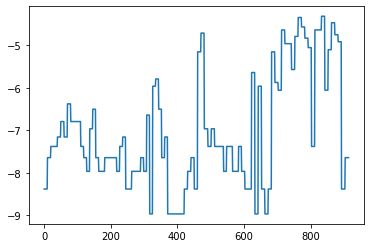

In [12]:
plt.plot(data['log_al'])

Удалим изначальный столбец `Al`

In [13]:
data.drop(["Al"], axis=1, inplace=True)

Можно так же увидеть что у нас столбец `V` имеет довольно странный вид, множество значений находится в промежутке `0 - 0.1`, посмотрим на значения в этом столбце

In [14]:
data['V'].value_counts()

0.000    533
0.230     80
0.070     40
0.270     30
0.040     30
0.280     20
0.240     20
0.050     20
0.030     20
0.080     20
0.009     11
0.005     11
0.300     10
0.210     10
0.260     10
0.042     10
0.079     10
0.043     10
0.060     10
0.088     10
Name: V, dtype: int64

In [15]:
(data['V'] == 0).sum() / data['V'].count()

0.5825136612021858

Нашли интересную информацию, количество ванадия в сплавах в 58% данных равняется 0, можно попробовать обработать эти данные или удалить, но у нас и так есть признаки по которым можно построить модель, поэтому удалим этот столбец

In [16]:
data.drop(['V'], axis=1, inplace=True)

In [17]:
data.head()

,Alloy code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,N,Ceq,Nb + Ta,Temperature,Proof_stress,Tensile_strength,Elongation,Reduction_in_area,log_al
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0066,0.0,0.0,27,342,490,30,71,-8.380822
1,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0066,0.0,0.0,100,338,454,27,72,-8.380822
2,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0066,0.0,0.0,200,337,465,23,69,-8.380822
3,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0066,0.0,0.0,300,346,495,21,70,-8.380822
4,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0066,0.0,0.0,400,316,489,26,79,-8.380822


Построим матрицу корреляций для дальнейшего анализа

<AxesSubplot:>

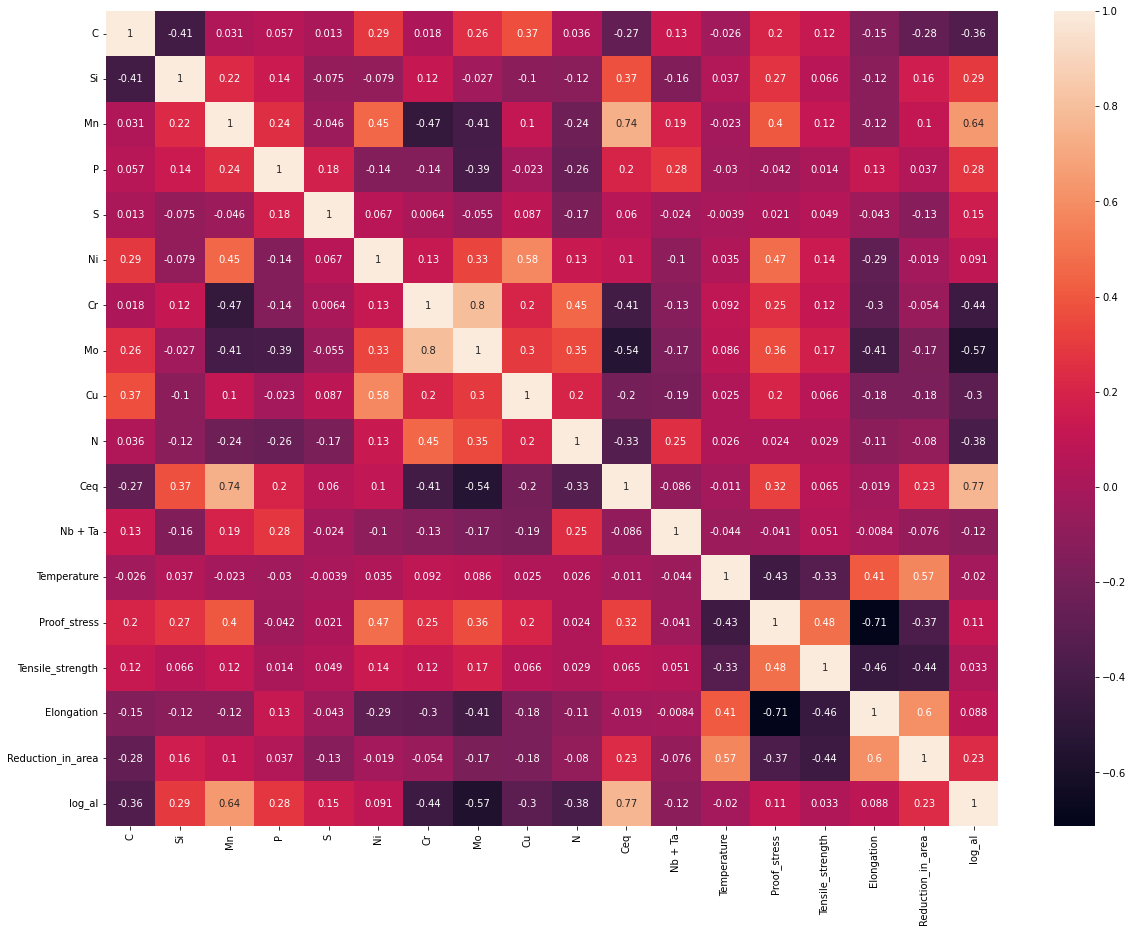

In [18]:
corr_matrix = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True)

# Выводы

После просмотра тепловой карты можно сделать следующие выводы:
- Положительно сильно коррелируют между собой (`Mn` и `Ceq`), (`Ceq` и `log_al`)
- Сильную отрицательную связь имеют `Elongation` и `Proof_stress`
- Между прочностью при натяжении и составом сплава нету связи


Таким образом, вернемся к нашим гипотезам:

#### Предположим, что связи между свойствами сплава `Proof Stress` и `Elongation` нет

 Эту гипотезу мы опровергаем, т.к по тепловой карте можно увидеть что связь есть

#### Предположим, что существует сильная связь между прочностью при натяжении и составом сплава

Эта гипотезу тоже опровергаем. т.к связь незначительная

# Построение моделей

## Подготовка данных

In [19]:
data.drop(['Alloy code'], axis=1, inplace=True)
data.drop(['Elongation'], axis=1, inplace=True)
data.drop(['Reduction_in_area'], axis=1, inplace=True)
data.drop(['Tensile_strength'], axis=1, inplace=True)

In [20]:
data = data[['C',
 'Si',
 'Mn',
 'P',
 'S',
 'Ni',
 'Cr',
 'Mo',
 'Cu',
 'N',
 'log_al',
 'Ceq',
 'Nb + Ta',
 'Temperature',
 'Proof_stress']]

In [21]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X

array([[1.20e-01, 3.60e-01, 5.20e-01, ..., 0.00e+00, 0.00e+00, 2.70e+01],
       [1.20e-01, 3.60e-01, 5.20e-01, ..., 0.00e+00, 0.00e+00, 1.00e+02],
       [1.20e-01, 3.60e-01, 5.20e-01, ..., 0.00e+00, 0.00e+00, 2.00e+02],
       ...,
       [2.20e-01, 2.20e-01, 1.24e+00, ..., 0.00e+00, 1.70e-03, 4.50e+02],
       [2.20e-01, 2.20e-01, 1.24e+00, ..., 0.00e+00, 1.70e-03, 5.00e+02],
       [2.20e-01, 2.20e-01, 1.24e+00, ..., 0.00e+00, 1.70e-03, 5.50e+02]])

## Масштабирование данных

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Поиск количества измерений

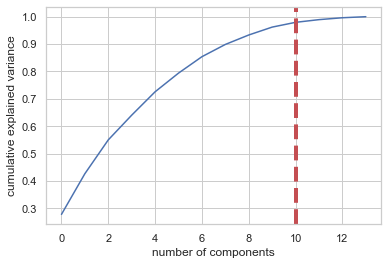

In [25]:
pca_test = PCA(n_components=14)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)

In [26]:
pca = PCA(n_components=10)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

## Для оценки модели возьмем метрику r2 - коэф. детерминации

In [27]:
scores = pd.DataFrame(columns={'Random Forest','Linear Regression', \
                              'Bayesian Regression','Stochastic Gradient'}, \
                      index=['Default','PCA'])

In [28]:
from sklearn.metrics import r2_score

# Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
scores['Random Forest'][0] = r2_score(y_test, y_pred)

# Random Forest PCA

In [44]:
rfc = RandomForestRegressor()
rfc.fit(X_train_scaled_pca, y_train)
y_pred = rfc.predict(X_test_scaled_pca)
scores['Random Forest'][1] = r2_score(y_test, y_pred)

# Linear Regression

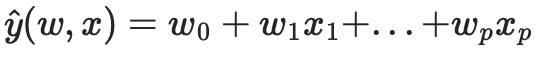

In [45]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
scores['Linear Regression'][0] = r2_score(y_test, y_pred)

# Linear Regression PCA

In [46]:
reg = LinearRegression()
reg.fit(X_train_scaled_pca, y_train)
y_pred = reg.predict(X_test_scaled_pca)
scores['Linear Regression'][1] = r2_score(y_test, y_pred)

# Bayesian Ridge Regression

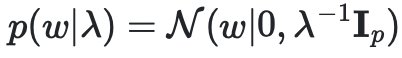

In [47]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
scores['Bayesian Regression'][0] = r2_score(y_test, y_pred)

# Bayesian Rigde Regression PCA

In [48]:
reg = linear_model.BayesianRidge()
reg.fit(X_train_scaled_pca, y_train)
y_pred = reg.predict(X_test_scaled_pca)
scores['Bayesian Regression'][1] = r2_score(y_test, y_pred)

# Stochastic Gradient Descent Regression

In [49]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=800, tol=1e-3))
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
scores['Stochastic Gradient'][0] = r2_score(y_test, y_pred)

# Stochastic Gragdient Descent Regression PCA

In [50]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=800, tol=1e-3))
reg.fit(X_train_scaled_pca, y_train)
y_pred = reg.predict(X_test_scaled_pca)
scores['Stochastic Gradient'][1] = r2_score(y_test, y_pred)

In [52]:
scores.sort_values(by=['Default','PCA'],axis=1,ascending=False)

,Random Forest,Linear Regression,Stochastic Gradient,Bayesian Regression
Default,0.934984,0.800044,0.798507,0.798067
PCA,0.9161,0.75282,0.752347,0.753154


Таким образом, лучшей моделью с метрикой коэф. детерминации является `случайный лес` без использования метода главных компонент.